In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
LR = 0.1
EPOCHS = 300

In [3]:
inputs = torch.tensor([[0., 0.5, 0.25, 1.], [1., 0.5, 0.25, 1.]])
labels = torch.tensor([0., 1.])

In [4]:
print(f'{"  INPUTS  ":#^30}')
print(inputs)
print(f'\n{"  LABELS  ":#^30}')
print(labels)

##########  INPUTS  ##########
tensor([[0.0000, 0.5000, 0.2500, 1.0000],
        [1.0000, 0.5000, 0.2500, 1.0000]])

##########  LABELS  ##########
tensor([0., 1.])


In [5]:
dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [6]:
class LSTMStatQuest(nn.Module):
    def __init__(self):
        super(LSTMStatQuest, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=1)

    def forward(self,x):
        input_reshape = x.view(len(x), 1)  # uma linha vira uma coluna
        lsmt_out, (hn, cn) = self.lstm(input_reshape)
        pred = lsmt_out[-1]
        return pred

In [7]:
model = LSTMStatQuest()

In [8]:
optimizer = Adam(model.parameters(), lr=LR)
criterion = nn.MSELoss()

In [9]:
# Antes de treinar:
# exemplo quando 0:
with torch.no_grad():
    pred_0 = model(inputs[0]) 
print(f"Company A: Observed = 0, Predicted = {pred_0}")
# exemplo quando 1:
with torch.no_grad():
    pred_1 = model(inputs[1])
print(f"Company B: Observed = 1, Predicted = {pred_1}")

Company A: Observed = 0, Predicted = tensor([0.6406])
Company B: Observed = 1, Predicted = tensor([0.6440])


In [10]:
loss_history = defaultdict(list)

In [11]:
optimizer.zero_grad(set_to_none=True)
for epoch in range(EPOCHS):
    epoch_loss = 0.0

    for X, y in dataloader:
        X = X.squeeze()
        optimizer.zero_grad()

        y_hat = model(X)
        loss = criterion(y_hat, y)

        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
     
    epoch_loss /= len(dataloader)
    loss_history['train_losses'].append(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch: [{epoch + 1}/{EPOCHS}] | Loss: {epoch_loss:.4f}')

Epoch: [10/300] | Loss: 0.2496
Epoch: [20/300] | Loss: 0.2509
Epoch: [30/300] | Loss: 0.2486
Epoch: [40/300] | Loss: 0.2393
Epoch: [50/300] | Loss: 0.1543
Epoch: [60/300] | Loss: 0.0048
Epoch: [70/300] | Loss: 0.0019
Epoch: [80/300] | Loss: 0.0012
Epoch: [90/300] | Loss: 0.0008
Epoch: [100/300] | Loss: 0.0006
Epoch: [110/300] | Loss: 0.0005
Epoch: [120/300] | Loss: 0.0004
Epoch: [130/300] | Loss: 0.0004
Epoch: [140/300] | Loss: 0.0033
Epoch: [150/300] | Loss: 0.0007
Epoch: [160/300] | Loss: 0.0006
Epoch: [170/300] | Loss: 0.0004
Epoch: [180/300] | Loss: 0.0003
Epoch: [190/300] | Loss: 0.0003
Epoch: [200/300] | Loss: 0.0002
Epoch: [210/300] | Loss: 0.0002
Epoch: [220/300] | Loss: 0.0002
Epoch: [230/300] | Loss: 0.0002
Epoch: [240/300] | Loss: 0.0002
Epoch: [250/300] | Loss: 0.0001
Epoch: [260/300] | Loss: 0.0001
Epoch: [270/300] | Loss: 0.0001
Epoch: [280/300] | Loss: 0.0001
Epoch: [290/300] | Loss: 0.0001
Epoch: [300/300] | Loss: 0.0001


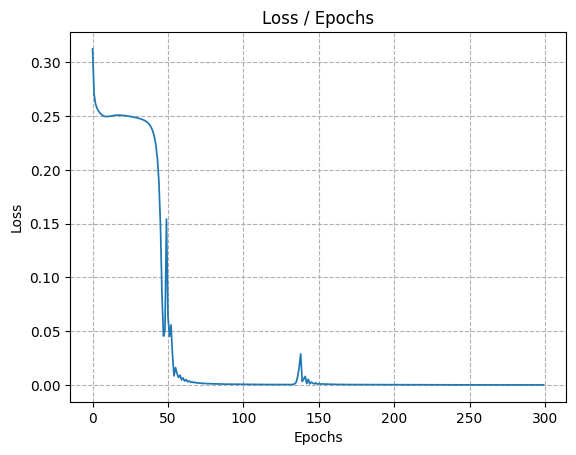

In [30]:
fig, ax = plt.subplots()
ax.plot(loss_history['train_losses'], linewidth=1.25, linestyle='-')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss / Epochs')
ax.grid(True, linestyle='--')
plt.show()

In [41]:
# Após o treinamento:
# exemplo quando 0:
with torch.no_grad():
    pred_0 = model(inputs[0]) 
print(f"Company A: Observed = 0, Predicted = {pred_0.round(decimals=1)}")
# exemplo quando 1:
with torch.no_grad():
    pred_1 = model(inputs[1])
print(f"Company B: Observed = 1, Predicted = {pred_1.round(decimals=1)}")

Company A: Observed = 0, Predicted = tensor([0.])
Company B: Observed = 1, Predicted = tensor([1.])
